# **Segmentación de Clientes**

## **Librerías y carga de dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Análisis Preliminar**

In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No existen valores nulos en el conjunto de datos

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


El rango de valores es muy similar, sin embargo sería buena idea escalarlos

## **Seleccionando las variables correctas**

Seleccionamos las variables de Anual Income y Spending score porque, en el escenario actual, personas de muchas edades tienen diferentes tipos de Spending score. Además, el Anual Income es un indicador directo del estatus económico de un individuo

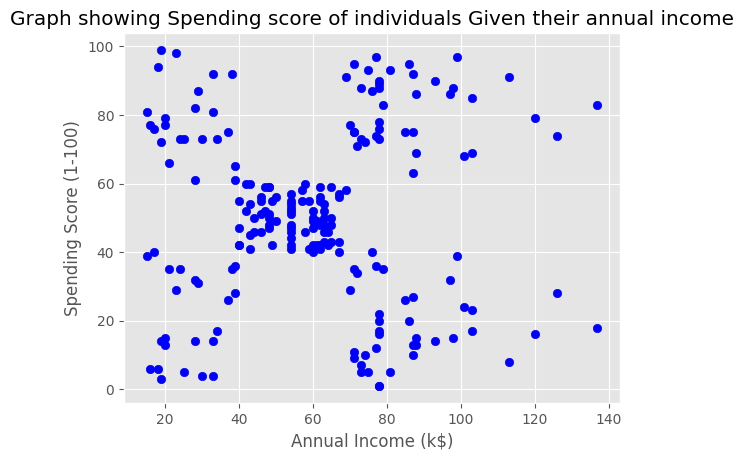

In [ ]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], color='b')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Graph showing Spending score of individuals Given their annual income")
plt.show()

## **Escalando los datos**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(data[["Annual Income (k$)"]])

data["Annual_income"] = scaler.transform(data[["Annual Income (k$)"]])

In [ ]:
scaler.fit(data[["Annual Income (k$)"]])

data["Annual_income"] = scaler.transform(data[["Annual Income (k$)"]])

In [ ]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_income
0,1,Male,19,15,39,0.000000
1,2,Male,21,15,81,0.000000
2,3,Female,20,16,6,0.008197
3,4,Female,23,16,77,0.008197
4,5,Female,31,17,40,0.016393


In [ ]:
new_data = data[["Annual_income", "Spending Score (1-100)"]]
new_data.head()

,Annual_income,Spending Score (1-100)
0,0.000000,39
1,0.000000,81
2,0.008197,6
3,0.008197,77
4,0.016393,40


## **K-means y el método del codo**

In [ ]:
k_range = list(range(1, 11))
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data[["Annual_income", "Spending Score (1-100)"]])
    sse.append(km.inertia_)

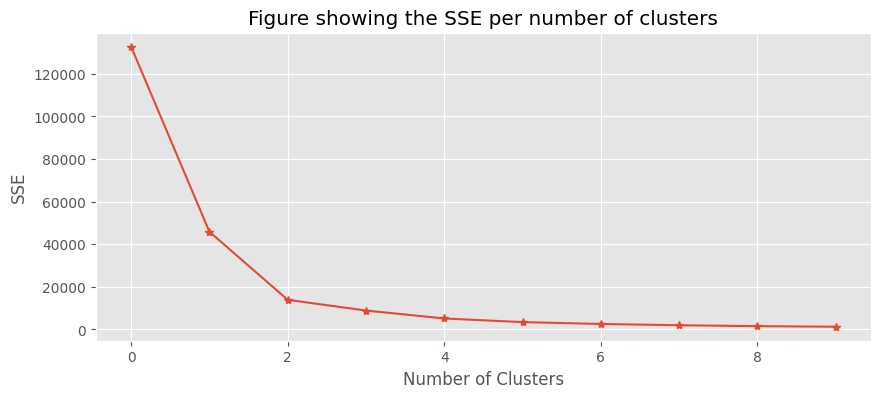

In [ ]:
plt.figure(figsize = (10, 4))
plt.plot(sse, marker = "*")
plt.title("Figure showing the SSE per number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Por lo tanto, de acuerdo con el método del codo, podemos elegir que nuestro número de clusters sea 5, ya que la disminución en la SSE del cluster 4 (cuando se cuenta desde 0) es mínima.
Por lo tanto, el número de clusters a tomar = 5.

## **Entrenando con el valor de K óptimo**

In [ ]:
km = KMeans(n_clusters = 5)

In [ ]:
y_predicted = km.fit_predict(new_data[["Annual_income", "Spending Score (1-100)"]])

In [ ]:
y_predicted

array([1, 4, 3, 4, 1, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 1, 4, 1, 2, 1, 4,
       3, 4, 3, 4, 1, 0, 1, 2, 3, 4, 3, 2, 3, 4, 3, 4, 1, 4, 1, 2, 1, 0,
       1, 4, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 4, 1, 2, 3, 4, 3, 4,
       1, 4, 3, 2, 3, 4, 3, 4, 3, 2, 1, 2, 3, 2, 1, 4, 3, 2, 3, 2, 3, 4,
       3, 2, 3, 4, 3, 4, 1, 2, 3, 2, 1, 4, 3, 2, 1, 0, 3, 4, 3, 2, 3, 2,
       3, 4, 3, 2, 1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 1, 4,
       3, 2], dtype=int32)

In [ ]:
new_data["cluster"] = (y_predicted + 1)

In [ ]:
new_data.head()

,Annual_income,Spending Score (1-100),cluster
0,0.000000,39,2
1,0.000000,81,5
2,0.008197,6,4
3,0.008197,77,5
4,0.016393,40,2


In [ ]:
new_data.cluster.unique()

array([2, 5, 4, 3, 1], dtype=int32)

In [ ]:
print("The coordinates of cluster centroids: ")
km.cluster_centers_

The coordinates of cluster centroids: 


array([[ 0.32006875, 52.79032258],
       [ 0.34282787, 37.        ],
       [ 0.48299939, 90.7037037 ],
       [ 0.43652795, 11.84615385],
       [ 0.34579918, 74.25      ]])

In [ ]:
df1 = new_data[new_data.cluster == 1]
df2 = new_data[new_data.cluster == 2]
df3 = new_data[new_data.cluster == 3]
df4 = new_data[new_data.cluster == 4]
df5 = new_data[new_data.cluster == 5]

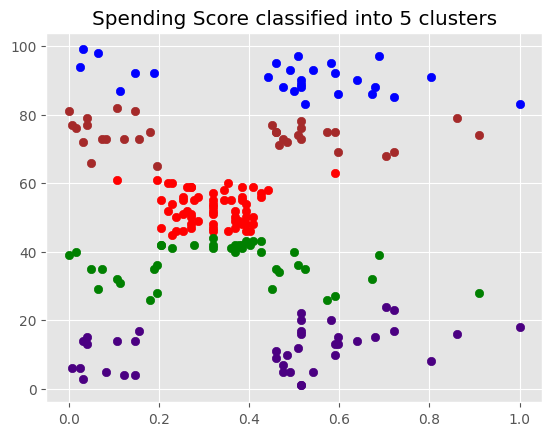

In [ ]:


plt.scatter(df1["Annual_income"], df1["Spending Score (1-100)"], color = "red")
plt.scatter(df2["Annual_income"], df2["Spending Score (1-100)"], color = "green")
plt.scatter(df3["Annual_income"], df3["Spending Score (1-100)"], color = "blue")
plt.scatter(df4["Annual_income"], df4["Spending Score (1-100)"], color = "indigo")
plt.scatter(df5["Annual_income"], df5["Spending Score (1-100)"], color = "brown")
plt.title("Spending Score classified into 5 clusters")
plt.show()



Hemos clasificado con éxito a los clientes en 5 grupos diferentes utilizando el algoritmo k-means. Ahora podemos analizar cada grupo individualmente para estudiar sus patrones de gasto y maximizar las ganancias en consecuencia